## Aprendizado Não-Supervisionado (Clustering)
### K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CSVs/store.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.columns = ['IdCliente', 'Genero', 'Idade',
              'Renda_Anual', 'Nivel_Gasto']
df.head()

,IdCliente,Genero,Idade,Renda_Anual,Nivel_Gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.set_index('IdCliente', inplace=True)
X = df[['Renda_Anual','Nivel_Gasto']]

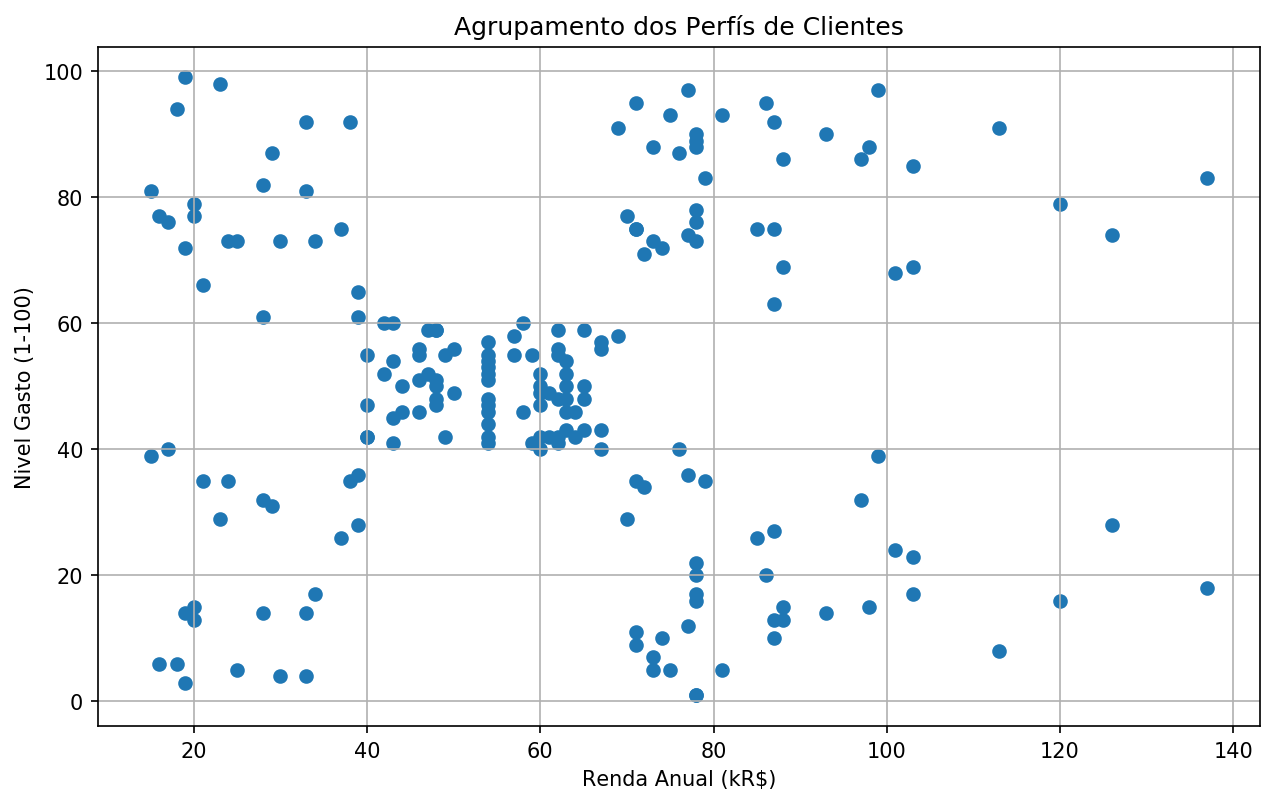

In [6]:
plt.figure(figsize=(10,6), dpi=150)
plt.scatter(X['Renda_Anual'].values,X['Nivel_Gasto'].values)
plt.xlabel('Renda Anual (kR$)')
plt.ylabel('Nivel Gasto (1-100)')
plt.title('Agrupamento dos Perfís de Clientes')
plt.grid()
plt.show()

### Identificar quantidade de Clusters
#### Método Elbow (Cotovelo)

In [7]:
from sklearn.cluster import KMeans

In [8]:
df.values

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male

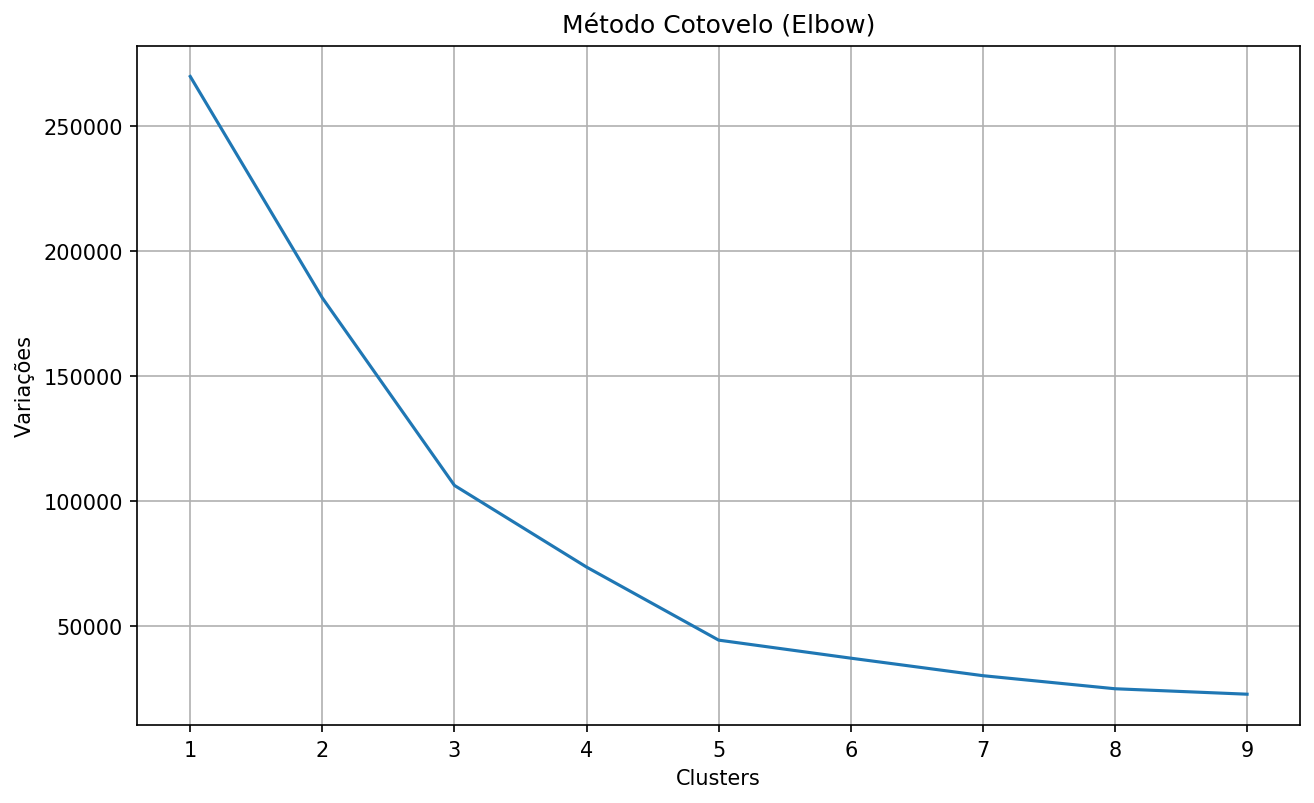

In [9]:
var = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    var.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6), dpi=150)
plt.plot(range(1,10), var)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.grid()
plt.show()

In [10]:
grp_kmeans = KMeans(n_clusters=5)
grp_kmeans.fit(df[['Renda_Anual','Nivel_Gasto']].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
cluster_pred = grp_kmeans.predict(X)
cluster_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2,
       4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [12]:
cluster_centro = grp_kmeans.cluster_centers_
cluster_centro

array([[25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

In [13]:
X.values[cluster_pred==3, 0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

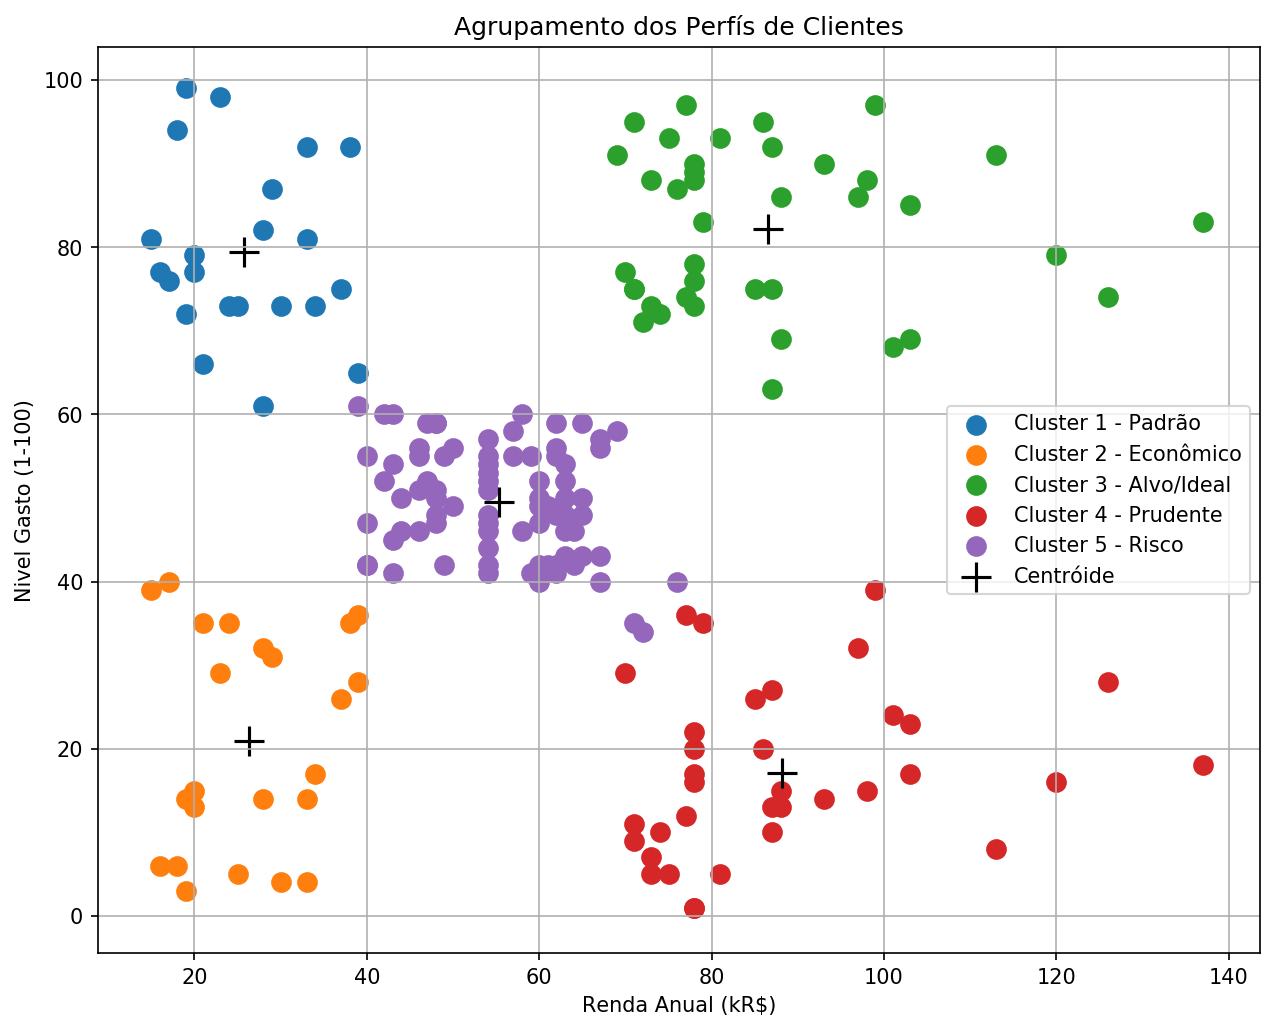

In [14]:
classe = ['Padrão','Econômico','Alvo/Ideal', 'Prudente','Risco']

plt.figure(figsize=(10,8), dpi=150)

[plt.scatter(X.values[cluster_pred==i, 0],\
             X.values[cluster_pred==i, 1],\
            label=f'Cluster {i+1} - {classe[i]}', s=80) for i in range(5)]

plt.scatter(cluster_centro[:,0],cluster_centro[:,1],
            marker='+', s=200, c='black', label='Centróide')

plt.xlabel('Renda Anual (kR$)')
plt.ylabel('Nivel Gasto (1-100)')
plt.title('Agrupamento dos Perfís de Clientes')

plt.legend()
plt.grid()
plt.show()